In [52]:
#!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=823d8b9a82facfc7bb1c3c2e32d995ffb7c553b3152042c32cec0398d93d764b
  Stored in directory: c:\users\luis\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


You should consider upgrading via the 'c:\users\luis\dropbox\personal\dataanalytics\bootcamp\bootcamp\scripts\python.exe -m pip install --upgrade pip' command.


In [26]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.graph_objects as go
from fbprophet.plot import plot_plotly, plot_components_plotly

In [47]:
df = pd.read_csv("data/data_filtered.csv")
df.head()

,Unnamed: 0,cve_institucion,cve_concepto,time,value
0,0,40002,1.000000e+11,2000-12-01,404155.539381
1,1,40002,1.000000e+11,2001-01-01,394339.144611
2,2,40002,1.000000e+11,2001-02-01,398165.969974
3,3,40002,1.000000e+11,2001-03-01,396748.807840
4,4,40002,1.000000e+11,2001-04-01,394034.682061


In [48]:
filter1 = df["cve_institucion"] == 102
df_banca = df.loc[filter1]
df_banca

,Unnamed: 0,cve_institucion,cve_concepto,time,value
33880,33880,102,5.100000e+11,2000-12-01,0.000000
33881,33881,102,5.100000e+11,2001-01-01,0.000000
33882,33882,102,5.100000e+11,2001-02-01,0.000000
33883,33883,102,5.100000e+11,2001-03-01,0.000000
33884,33884,102,5.100000e+11,2001-04-01,0.000000
...,...,...,...,...,...
418655,418655,102,2.111000e+11,2020-09-01,205695.442756
418656,418656,102,2.111000e+11,2020-10-01,199114.453947
418657,418657,102,2.111000e+11,2020-11-01,199352.646786
418658,418658,102,2.111000e+11,2020-12-01,187995.073834


In [49]:
filter2 = df_banca["cve_concepto"] == 131101000000
df_banca_cve = df_banca.loc[filter2]
df_banca_cve

,Unnamed: 0,cve_institucion,cve_concepto,time,value
340978,340978,102,1.311010e+11,2000-12-01,0.000000
340979,340979,102,1.311010e+11,2001-01-01,0.000000
340980,340980,102,1.311010e+11,2001-02-01,0.000000
340981,340981,102,1.311010e+11,2001-03-01,0.000000
340982,340982,102,1.311010e+11,2001-04-01,0.000000
...,...,...,...,...,...
341215,341215,102,1.311010e+11,2020-09-01,91982.170531
341216,341216,102,1.311010e+11,2020-10-01,91331.836118
341217,341217,102,1.311010e+11,2020-11-01,95436.233510
341218,341218,102,1.311010e+11,2020-12-01,89991.449152


In [50]:
df_prophet = df_banca_cve[["time","value"]]
df_prophet = df_prophet.rename(columns={
    "time": "ds",
    "value": "y"
})
df_prophet

,ds,y
340978,2000-12-01,0.000000
340979,2001-01-01,0.000000
340980,2001-02-01,0.000000
340981,2001-03-01,0.000000
340982,2001-04-01,0.000000
...,...,...
341215,2020-09-01,91982.170531
341216,2020-10-01,91331.836118
341217,2020-11-01,95436.233510
341218,2020-12-01,89991.449152


In [51]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
future = m.make_future_dataframe(periods=60, freq='MS')
future.tail()

,ds
297,2025-09-01
298,2025-10-01
299,2025-11-01
300,2025-12-01
301,2026-01-01


In [53]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
297,2025-09-01,115933.437913,99861.134384,131752.558479
298,2025-10-01,120608.445095,103787.600119,135670.739846
299,2025-11-01,122503.143910,107276.079895,138644.740875
300,2025-12-01,121023.957915,105023.201175,138320.015754
301,2026-01-01,120128.081043,101972.604282,137507.093878


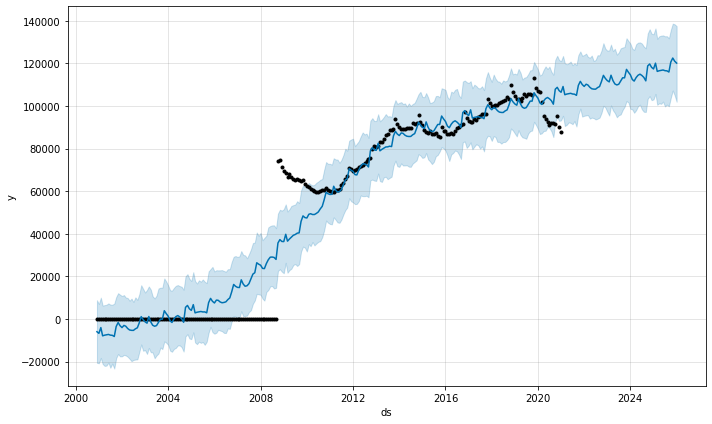

In [54]:

fig1 = m.plot(forecast)

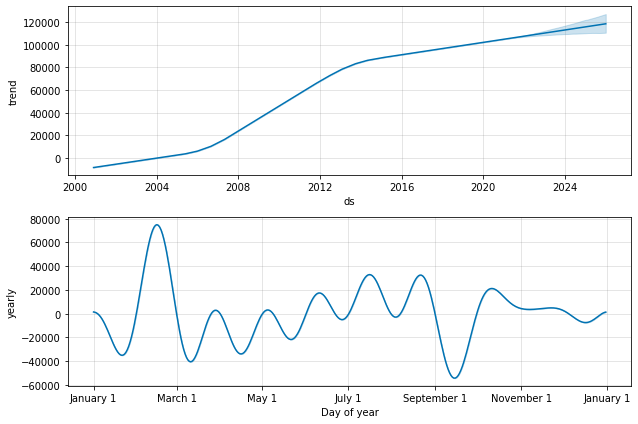

In [55]:
fig2 = m.plot_components(forecast)

In [56]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [57]:
plot_plotly(m, forecast)

In [13]:
plot_components_plotly(m, forecast)

# Save the Model with Pickle

In [27]:
import pickle

In [29]:
pkl_path = "data/models/21_100000000000.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)

# save the dataframe
forecast.to_pickle("data/models/21_100000000000_forecast.pkl")
print("*** Data Saved ***")

*** Data Saved ***


In [30]:
# read the Prophet model object
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

fcast = pd.read_pickle("data/models/21_100000000000_forecast.pkl")

In [32]:
fcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-12-01,2.061549e+06,1.752351e+06,2.251870e+06,2.061549e+06,2.061549e+06,-55093.450687,-55093.450687,-55093.450687,-55093.450687,-55093.450687,-55093.450687,0.0,0.0,0.0,2.006455e+06
1,2001-01-01,2.075883e+06,1.772453e+06,2.264241e+06,2.075883e+06,2.075883e+06,-57395.584834,-57395.584834,-57395.584834,-57395.584834,-57395.584834,-57395.584834,0.0,0.0,0.0,2.018487e+06
2,2001-02-01,2.090216e+06,1.736222e+06,2.254249e+06,2.090216e+06,2.090216e+06,-93605.865992,-93605.865992,-93605.865992,-93605.865992,-93605.865992,-93605.865992,0.0,0.0,0.0,1.996611e+06
3,2001-03-01,2.103163e+06,1.857524e+06,2.377550e+06,2.103163e+06,2.103163e+06,11955.750838,11955.750838,11955.750838,11955.750838,11955.750838,11955.750838,0.0,0.0,0.0,2.115119e+06
4,2001-04-01,2.117497e+06,1.926106e+06,2.424109e+06,2.117497e+06,2.117497e+06,46902.427082,46902.427082,46902.427082,46902.427082,46902.427082,46902.427082,0.0,0.0,0.0,2.164400e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2021-12-28,1.201226e+07,1.207329e+07,1.256588e+07,1.199161e+07,1.203303e+07,303360.043262,303360.043262,303360.043262,303360.043262,303360.043262,303360.043262,0.0,0.0,0.0,1.231562e+07
603,2021-12-29,1.201422e+07,1.195623e+07,1.248254e+07,1.199351e+07,1.203507e+07,202783.092926,202783.092926,202783.092926,202783.092926,202783.092926,202783.092926,0.0,0.0,0.0,1.221701e+07
604,2021-12-30,1.201619e+07,1.186941e+07,1.237773e+07,1.199540e+07,1.203710e+07,110242.179316,110242.179316,110242.179316,110242.179316,110242.179316,110242.179316,0.0,0.0,0.0,1.212643e+07
605,2021-12-31,1.201815e+07,1.180685e+07,1.231304e+07,1.199730e+07,1.203913e+07,27991.439355,27991.439355,27991.439355,27991.439355,27991.439355,27991.439355,0.0,0.0,0.0,1.204614e+07


# Save the model with JSON

In [44]:
import json
from fbprophet.serialize import model_to_json, model_from_json

In [46]:
with open('data/models/serialized_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

In [48]:
with open('data/models/serialized_model.json', 'r') as fin:
    m = model_from_json(json.load(fin))  # Load model

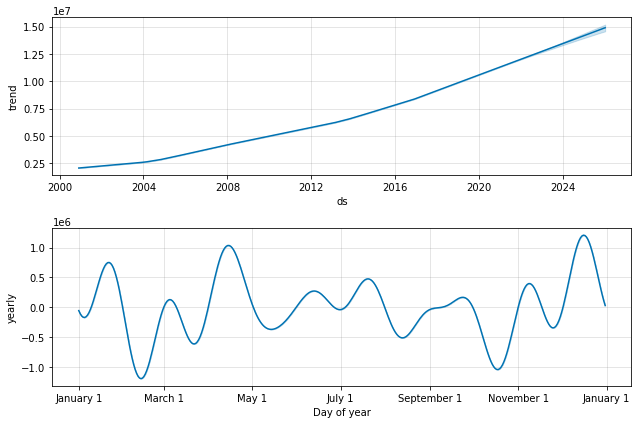

In [49]:
fig3 = m.plot_components(forecast)

In [62]:
import pystan
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)  # this will take a minute
y = model.sampling(n_jobs=1).extract()['y']
y.mean()  # should be close to 0

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.


-0.013117666383373758

# With the exchange rate for USD to Mexican Pesos

In [13]:
tc = pd.read_csv("data/20210316 TC USD.csv")
tc.head()

,ds,y
0,2018-01-02,19.66
1,2018-01-03,19.49
2,2018-01-04,19.37
3,2018-01-05,19.24
4,2018-01-08,19.27


In [14]:
m = Prophet()
m.fit(tc)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1164,2022-03-12
1165,2022-03-13
1166,2022-03-14
1167,2022-03-15
1168,2022-03-16


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1164,2022-03-12,19.385749,3.180347,34.923366
1165,2022-03-13,19.443289,2.936834,35.138714
1166,2022-03-14,20.465208,3.982327,36.081318
1167,2022-03-15,20.543464,3.930597,36.426745
1168,2022-03-16,20.584909,3.888465,36.227092


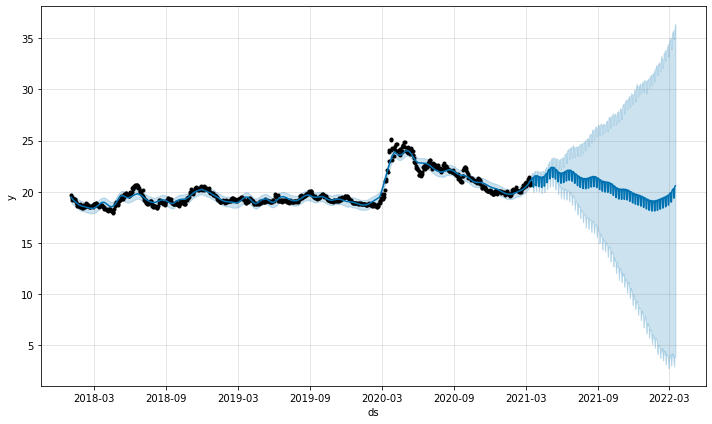

In [17]:
fig1 = m.plot(forecast)

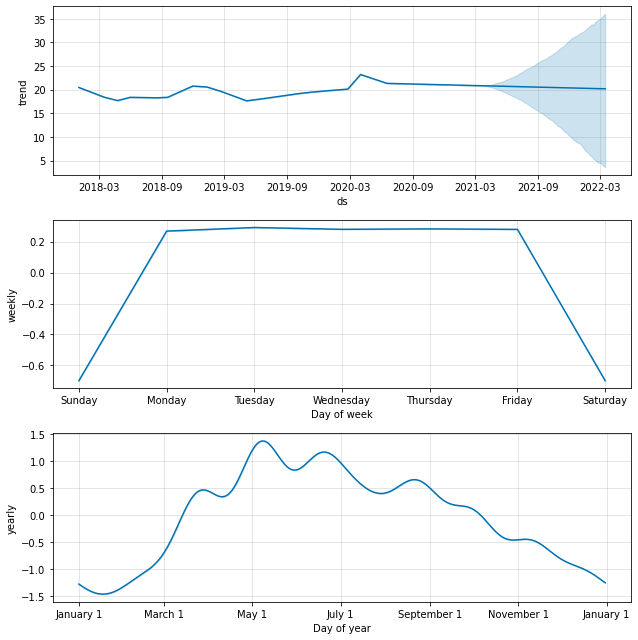

In [18]:
fig2 = m.plot_components(forecast)

In [19]:
plot_plotly(m, forecast)

In [20]:
tc["y"].max()

25.12

In [24]:
tc["y"].min()

17.98

In [21]:
(20.76+25.12)/2

22.94

In [25]:
(17.98+25.12)/2

21.55